# T1

In [2]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import xgboost as xgb
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import StandardScaler


In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import time
import numpy as np
import pandas as pd
import seaborn as sb

In [4]:
data = pd.read_csv("T1_features_final.csv")
X = data.iloc[:, :-1]
y = data.iloc[:, -1]
X = np.asarray(X)
y = np.asarray(y)

In [5]:
y.shape


(52,)

In [5]:
# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier
rf_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_classifier.predict(X_test)

# Evaluate the accuracy of the classifier
rf_accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", rf_accuracy)

Accuracy: 0.7272727272727273


In [8]:
# Create an SVM classifier
svm_classifier = SVC(kernel='rbf', random_state=42)

# Train the classifier
svm_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = svm_classifier.predict(X_test)

# Evaluate the accuracy of the classifier
svm_accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", svm_accuracy)

Accuracy: 0.7272727272727273


In [9]:
gb_classifier = xgb.XGBClassifier(random_state=42)

# Train the classifier
gb_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = gb_classifier.predict(X_test)

# Evaluate the accuracy of the classifier
gb_accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", gb_accuracy)


Accuracy: 0.7272727272727273


In [10]:
# Create a logistic regression classifier
logreg_classifier = LogisticRegression()
logreg_classifier = LogisticRegression(max_iter=1000)
# Train the classifier
logreg_classifier.fit(X_train, y_train)


# Make predictions on the test set
y_pred = logreg_classifier.predict(X_test)

# Evaluate the accuracy of the classifier
lr_accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", lr_accuracy)

Accuracy: 0.6363636363636364


In [6]:
from keras.models import Sequential, load_model
from keras.layers import Dense

from keras.callbacks import ModelCheckpoint
from keras.regularizers import l1, l2
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import RFE


In [7]:
norm = Normalizer(norm='max')
norm.fit(X_train)
X_train = norm.transform(X_train)

# Standardize the data 
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [15]:

rfe = RFE(estimator=model1, n_features_to_select=1)
rfe.fit(X_train_scaled, y_train)

# Get the selected features from RFE
selected_features = X_train.columns[rfe.support_]

# Initialize the neural network classifier

model1 = Sequential()
model1.add(Dense(512, activation='relu', kernel_regularizer=l1(0.01), input_dim=selected_features))
model1.add(Dense(512, activation='relu', kernel_regularizer=l2(0.01)))
model1.add(Dense(1, activation='sigmoid'))
model1.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Create a ModelCheckpoint callback to save the best model
checkpoint = ModelCheckpoint('best_model.h5', monitor='val_accuracy', save_best_only=True, mode='max', verbose=1)

# Train the model with the callback
model1.fit(X_train_scaled, y_train, epochs=1000, batch_size=32, validation_data=(X_test_scaled, y_test), callbacks=[checkpoint])

# Load the best model
model1 = load_model('best_model.h5')

# Make predictions on the test set
y_pred = model1.predict(X_test_scaled)
y_pred = (y_pred > 0.5).astype(int)  # Convert probabilities to binary predictions

# Evaluate the accuracy of the model
ann_accuracy = accuracy_score(y_test, y_pred)
print("Best Accuracy:", ann_accuracy)

# Get the selected features from RFE
selected_features = X_train.columns[rfe.support_]

# Plot the selected features
plt.bar(selected_features, rfe.estimator_.coef_.reshape(-1), color='blue')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Selected Features')
plt.ylabel('Coefficient')
plt.title('Coefficients of Selected Features')
plt.tight_layout()
plt.show()


NameError: name 'model1' is not defined

In [9]:
from keras.callbacks import ModelCheckpoint
from keras.regularizers import l1, l2

model1 = Sequential()
model1.add(Dense(512, activation='relu',kernel_regularizer=l1(0.01),input_dim=13))
model1.add(Dense(512, activation='relu',kernel_regularizer=l2(0.01)))
model1.add(Dense(1, activation='sigmoid'))
model1.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
# Create a ModelCheckpoint callback to save the best model
checkpoint = ModelCheckpoint('best_model.h5', monitor='val_accuracy', save_best_only=True, mode='max', verbose=1)

# Train the model with the callback
model1.fit(X_train, y_train, epochs=1000, batch_size=32, validation_data=(X_test, y_test), callbacks=[checkpoint])

# Load the best model
model1 = load_model('best_model.h5')

# Make predictions on the test set
y_pred = model1.predict(X_test)
y_pred = (y_pred > 0.5).astype(int)  # Convert probabilities to binary predictions

# Evaluate the accuracy of the model
ann_accuracy = accuracy_score(y_test, y_pred)
print("Best Accuracy:", ann_accuracy)

Epoch 1/1000
1/2 [==============>...............] - ETA: 1s - loss: 9.4233 - accuracy: 0.5000
Epoch 1: val_accuracy improved from -inf to 0.63636, saving model to best_model.h5
2/2 [==============================] - 2s 387ms/step - loss: 9.3632 - accuracy: 0.5122 - val_loss: 9.0980 - val_accuracy: 0.6364
Epoch 2/1000
1/2 [==============>...............] - ETA: 0s - loss: 8.8958 - accuracy: 0.7500
Epoch 2: val_accuracy did not improve from 0.63636
2/2 [==============================] - 0s 116ms/step - loss: 8.8450 - accuracy: 0.7073 - val_loss: 8.8821 - val_accuracy: 0.6364
Epoch 3/1000
1/2 [==============>...............] - ETA: 0s - loss: 8.4083 - accuracy: 0.6250
Epoch 3: val_accuracy did not improve from 0.63636
2/2 [==============================] - 0s 58ms/step - loss: 8.3552 - accuracy: 0.6341 - val_loss: 8.5141 - val_accuracy: 0.2727
Epoch 4/1000
1/2 [==============>...............] - ETA: 0s - loss: 7.9402 - accuracy: 0.6875
Epoch 4: val_accuracy did not improve from 0.63636
2/

1/1 [==============================] - 0s 80ms/step


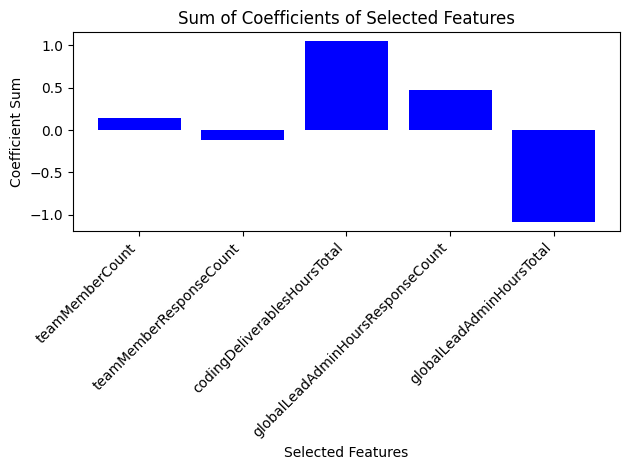

In [10]:
# Manually Perform Recursive Feature Elimination (RFE)
num_features_to_select = 5 # Set the desired number of features

# Create a list to store the selected feature indices
selected_feature_indices = []

for i in range(num_features_to_select):
    remaining_indices = list(set(range(X_train.shape[1])) - set(selected_feature_indices))
    best_score = 0.0
    best_index = None
    
    for index in remaining_indices:
        selected_indices = selected_feature_indices + [index]
        
        # Train the model with the selected features
        model = Sequential()
        model.add(Dense(512, activation='relu', kernel_regularizer='l1', input_dim=len(selected_indices)))
        model.add(Dense(512, activation='relu', kernel_regularizer='l2'))
        model.add(Dense(1, activation='sigmoid'))
        model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
        
        model.fit(X_train[:, selected_indices], y_train, epochs=300, batch_size=32, verbose=0)
        
        # Evaluate the model on the validation set (X_test_scaled)
        y_pred_val = model.predict(X_test[:, selected_indices])
        y_pred_val = (y_pred_val > 0.5).astype(int)
        score = accuracy_score(y_test, y_pred_val)
        
        # Check if this feature subset is better
        if score > best_score:
            best_score = score
            best_index = index
    
    selected_feature_indices.append(best_index)

# Get the selected features' names
selected_features = data.columns[selected_feature_indices]

# Plot the selected features (you can use feature importance instead of coefficients if you like)
plt.bar(selected_features, model1.get_weights()[0][selected_feature_indices, :].sum(axis=1), color='blue')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Selected Features')
plt.ylabel('Coefficient Sum')
plt.title('Sum of Coefficients of Selected Features')
plt.tight_layout()
plt.show()


In [13]:

# Initialize the neural network classifier
model1 = Sequential()
model1.add(Dense(512, activation='relu', kernel_regularizer=l1(0.01), input_dim=len(selected_features)))
model1.add(Dense(512, activation='relu', kernel_regularizer=l2(0.01)))
model1.add(Dense(1, activation='sigmoid'))
model1.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Create a ModelCheckpoint callback to save the best model
checkpoint = ModelCheckpoint('best_model.h5', monitor='val_accuracy', save_best_only=True, mode='max', verbose=1)

# Train the model with the callback using the selected features
model1.fit(X_train[selected_features], y_train, epochs=1000, batch_size=32, validation_data=(X_test[selected_features], y_test), callbacks=[checkpoint])

# Load the best model
model1 = load_model('best_model.h5')

# Make predictions on the test set using the selected features
y_pred = model1.predict(X_test[selected_features])
y_pred = (y_pred > 0.5).astype(int)  # Convert probabilities to binary predictions

# Evaluate the accuracy of the model
ann_accuracy = accuracy_score(y_test, y_pred)
print("Best Accuracy:", ann_accuracy)


IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [ ]:
from sklearn.model_selection import GridSearchCV
from keras.callbacks import ModelCheckpoint
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.metrics import accuracy_score
from keras.regularizers import l1, l2
from keras.optimizers import Adam, RMSprop, SGD, Adagrad
from keras.activations import relu, sigmoid, tanh

# Define a function to create model
def create_model(optimizer='adam', activation='relu', dropout_rate=0.0, hidden_layers=1, neurons=256, kernel_regularizer=None, learning_rate=0.001):
    model = Sequential()
    model.add(Dense(neurons, activation=activation, input_dim=8, kernel_regularizer=kernel_regularizer))
    
    for _ in range(hidden_layers - 1):
        model.add(Dense(neurons, activation=activation, kernel_regularizer=kernel_regularizer))
        model.add(Dropout(dropout_rate))
    
    model.add(Dense(1, activation='sigmoid'))
    if optimizer == 'adam':
        opt = Adam(learning_rate=learning_rate)
    elif optimizer == 'rmsprop':
        opt = RMSprop(learning_rate=learning_rate)
    elif optimizer == 'sgd':
        opt = SGD(learning_rate=learning_rate)
    elif optimizer == 'adagrad':
        opt = Adagrad(learning_rate=learning_rate)
    else:
        raise ValueError("Invalid optimizer.")
        
    model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Define the hyperparameters to search
param_grid = {
    'optimizer': ['adam', 'rmsprop', 'sgd', 'adagrad'],
    'batch_size': [32, 64],
    'activation': ['relu', 'sigmoid', 'tanh'],
    'dropout_rate': [0.0, 0.2, 0.4],
    'hidden_layers': [1, 2, 3],
    'neurons': [256, 512, 1024],
    'kernel_regularizer': [None, l1(0.01), l2(0.01)],
    'learning_rate': [0.001, 0.01, 0.1]
}

# Create the KerasClassifier wrapper
model = KerasClassifier(build_fn=create_model, verbose=0)

# Create a callback for ModelCheckpoint to save the best model during training
checkpoint = ModelCheckpoint('best_model.h5', monitor='val_accuracy', save_best_only=True, mode='max')

# Create the GridSearchCV object with the updated parameters
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3)

# Split data into training and validation sets (replace X_train and y_train with your actual data)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Fit the data to the GridSearchCV object, including the ModelCheckpoint callback
grid_result = grid_search.fit(X_train, y_train, validation_data=(X_val, y_val), callbacks=[checkpoint])

# Print the best parameters and the corresponding accuracy
print("Best Parameters: ", grid_result.best_params_)
print("Best Accuracy: ", grid_result.best_score_)

 

C:\Users\surface\AppData\Local\Temp\ipykernel_7924\623638157.py:48: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasClassifier(build_fn=create_model, verbose=0)


Best Parameters:  {'activation': 'relu', 'batch_size': 64, 'dropout_rate': 0.0, 'hidden_layers': 2, 'kernel_regularizer': <keras.regularizers.L2 object at 0x000001A5F5EA4810>, 'learning_rate': 0.001, 'neurons': 512, 'optimizer': 'sgd'}
Best Accuracy:  0.7268518606821696


In [ ]:

weights = model1.get_weights()
print(weights)

[array([[ 2.3873817e-02,  5.0226256e-02,  2.8300490e-03, ...,
        -2.4981288e-02, -1.3982695e-04, -7.1992889e-02],
       [-8.3030429e-04, -2.7908278e-03, -1.4414072e-05, ...,
         3.0644991e-02, -1.0996897e-05,  5.7202041e-02],
       [-1.2269654e-04,  1.4529286e-04,  7.4660529e-05, ...,
        -3.3049402e-04,  1.1814263e-06, -9.4085153e-05],
       [-2.3905588e-04, -3.7864246e-04, -2.7138530e-04, ...,
        -2.2796143e-04,  9.1351809e-05,  1.0352095e-03],
       [-2.8071152e-05,  5.5069217e-05, -2.0905398e-04, ...,
         3.8007414e-04,  6.4595522e-05, -1.7726069e-04],
       [-7.3631199e-05,  7.6615848e-05, -3.0473355e-05, ...,
        -4.0207070e-04,  1.7948187e-04,  1.0291260e-05]], dtype=float32), array([ 7.19176838e-04, -1.69596914e-02, -1.59551855e-02, -1.30469194e-02,
       -2.25702450e-02, -2.27382425e-02, -3.07719000e-02, -1.26543418e-02,
        3.85800755e-04, -2.29690894e-02, -2.21624058e-02, -2.02123988e-02,
        4.51812462e-04, -1.02975676e-02, -1.61436

In [ ]:
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               4608      
                                                                 
 dense_1 (Dense)             (None, 512)               262656    
                                                                 
 dense_2 (Dense)             (None, 1)                 513       
                                                                 
Total params: 267,777
Trainable params: 267,777
Non-trainable params: 0
_________________________________________________________________


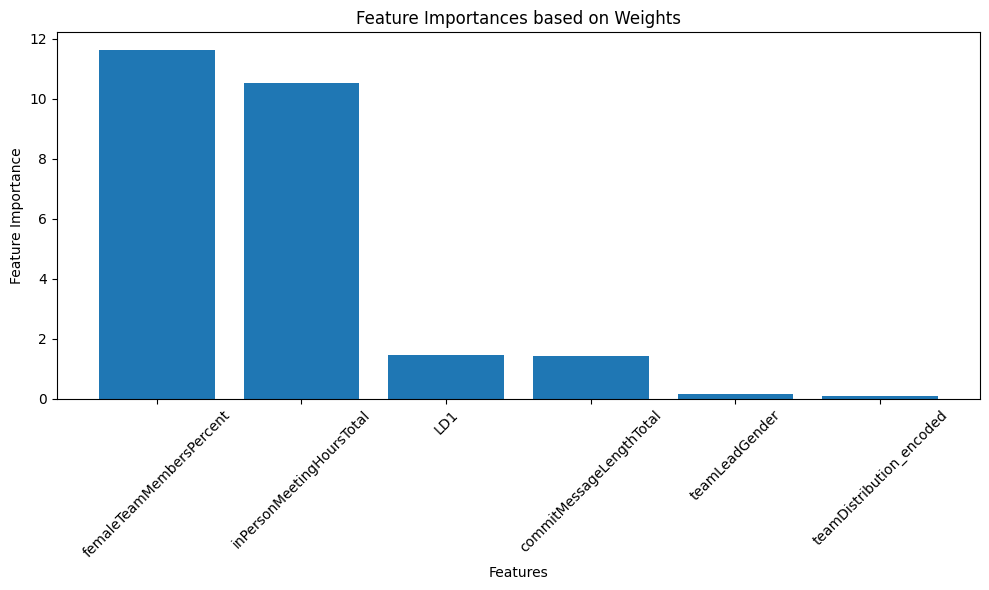

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Get the weights of the first layer
weights = model1.layers[0].get_weights()[0]

# Calculate the absolute sum of weights for each feature
feature_importances = np.abs(weights).sum(axis=1)

# Create a list of feature names
feature_names = ["femaleTeamMembersPercent", "inPersonMeetingHoursTotal", "LD1", "commitMessageLengthTotal", "teamLeadGender","teamDistribution_encoded", "productLetterGrade_encoded"]

# Sort the feature importances and feature names in descending order
sorted_indices = np.argsort(feature_importances)[::-1]
sorted_feature_importances = feature_importances[sorted_indices]
sorted_feature_names = [feature_names[i] for i in sorted_indices]

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.bar(range(len(sorted_feature_importances)), sorted_feature_importances, align='center')
plt.xticks(range(len(sorted_feature_importances)), sorted_feature_names, rotation=45)
plt.xlabel('Features')
plt.ylabel('Feature Importance')
plt.title('Feature Importances based on Weights')
plt.tight_layout()
plt.show()


In [ ]:
# Select instances with positive (class 1) labels
positive_indices = np.where(y_test == 1)[0]
positive_instances = X_test[positive_indices]

# Select instances with negative (class 0) labels
negative_indices = np.where(y_test == 0)[0]
negative_instances = X_test[negative_indices]

# Select misclassified instances
y_pred = model1.predict(X_test)
misclassified_indices = np.where(y_pred != y_test)[0]
misclassified_instances = X_test[misclassified_indices]


1/1 [==============================] - 0s 71ms/step


Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
keras is no longer supported, please use tf.keras instead.
Your TensorFlow version is newer than 2.4.0 and so graph support has been removed in eager mode and some static graphs may not be supported. See PR #1483 for discussion.
`tf.keras.backend.set_learning_phase` is deprecated and will be removed after 2020-10-11. To update it, simply pass a True/False value to the `training` argument of the `__call__` method of your layer or model.


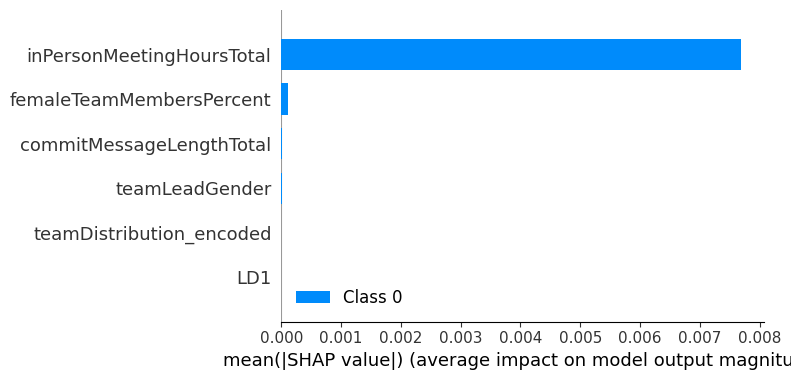

In [15]:

import shap

import matplotlib.pyplot as plt

feature_names = ["femaleTeamMembersPercent", "inPersonMeetingHoursTotal", "LD1", "commitMessageLengthTotal", "teamLeadGender","teamDistribution_encoded", "productLetterGrade_encoded"]

explainer = shap.DeepExplainer(model1, X_train)
shap_values = explainer.shap_values(X_test)



shap.summary_plot(shap_values, X_test, feature_names=feature_names)


In [ ]:
explainer = shap.Explainer(model1, X_test)
shap_values = explainer(X_test)



shap.plots.beeswarm(shap_values)


NameError: name 'shap' is not defined

1/1 [==============================] - 0s 32ms/step


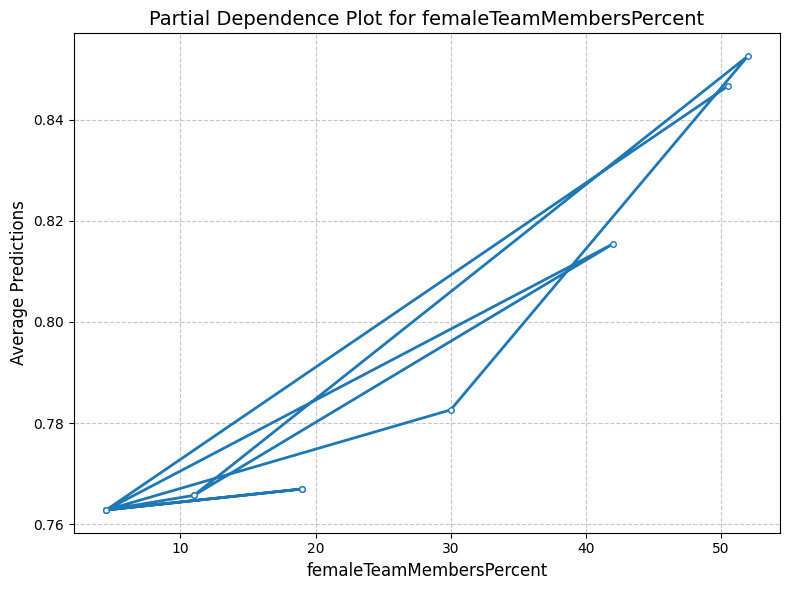

1/1 [==============================] - 0s 33ms/step


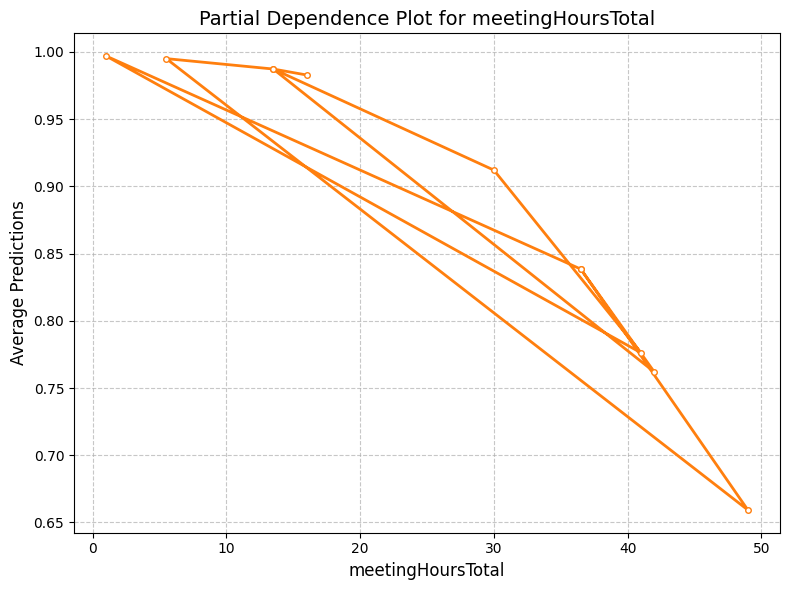

1/1 [==============================] - 0s 30ms/step


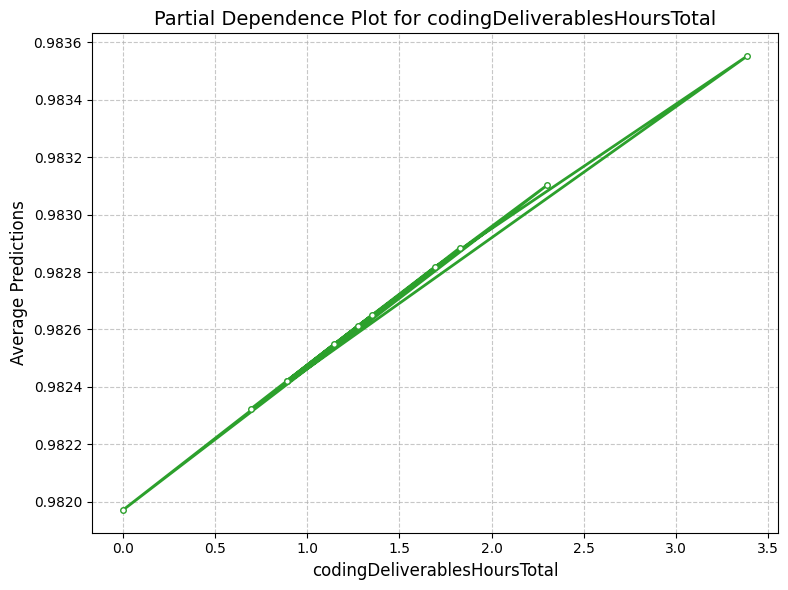

1/1 [==============================] - 0s 44ms/step


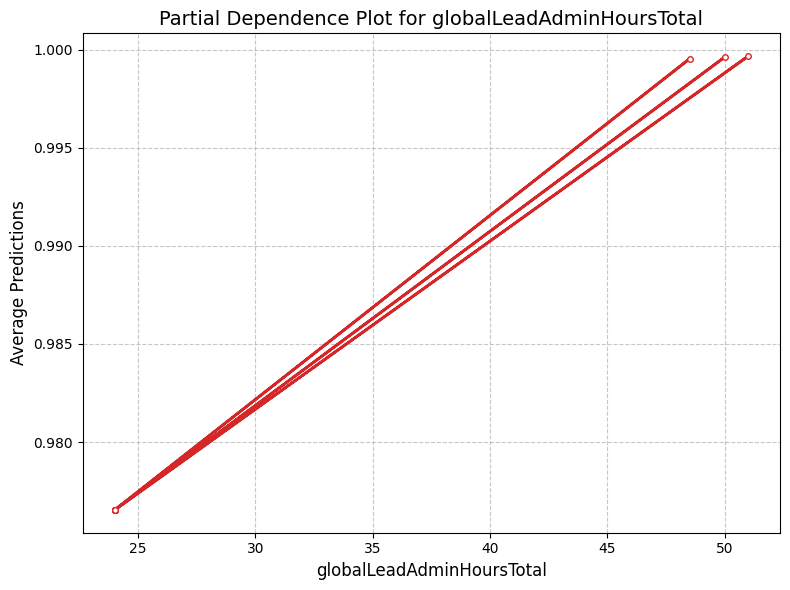

1/1 [==============================] - 0s 30ms/step


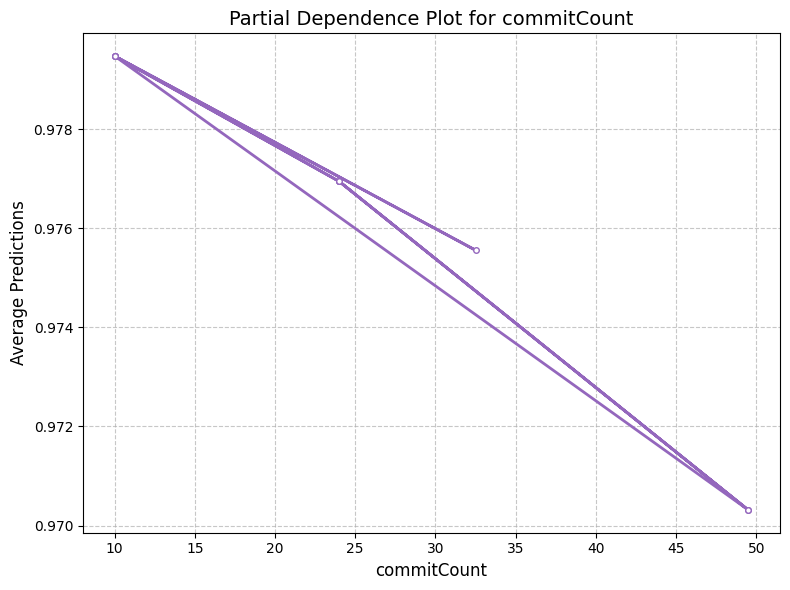

1/1 [==============================] - 0s 36ms/step


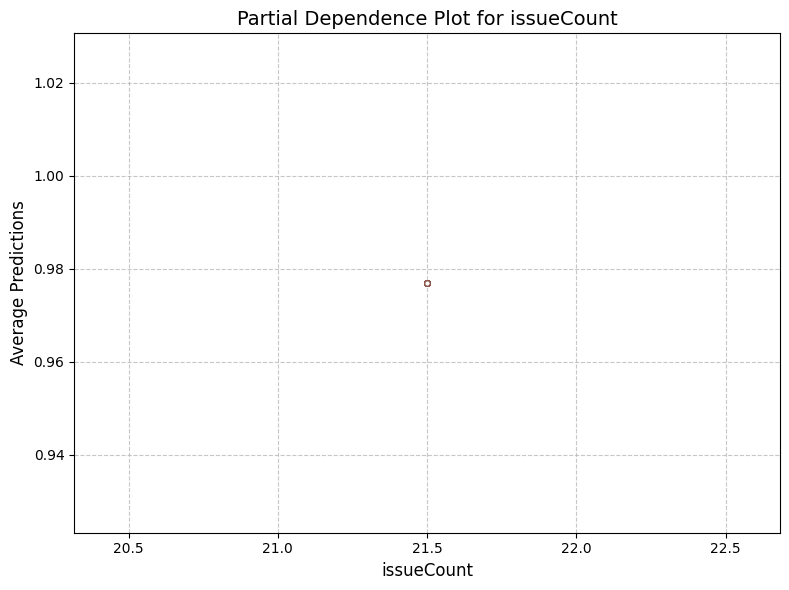

1/1 [==============================] - 0s 60ms/step


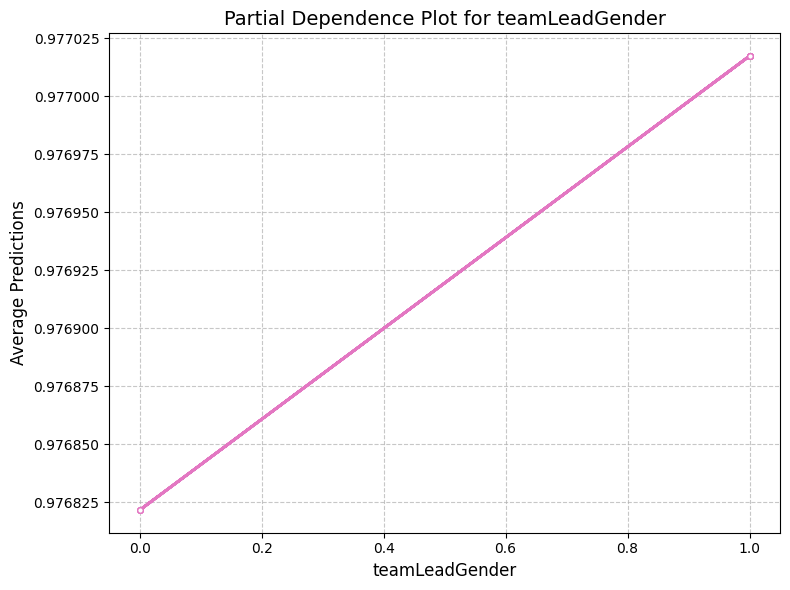

1/1 [==============================] - 0s 38ms/step


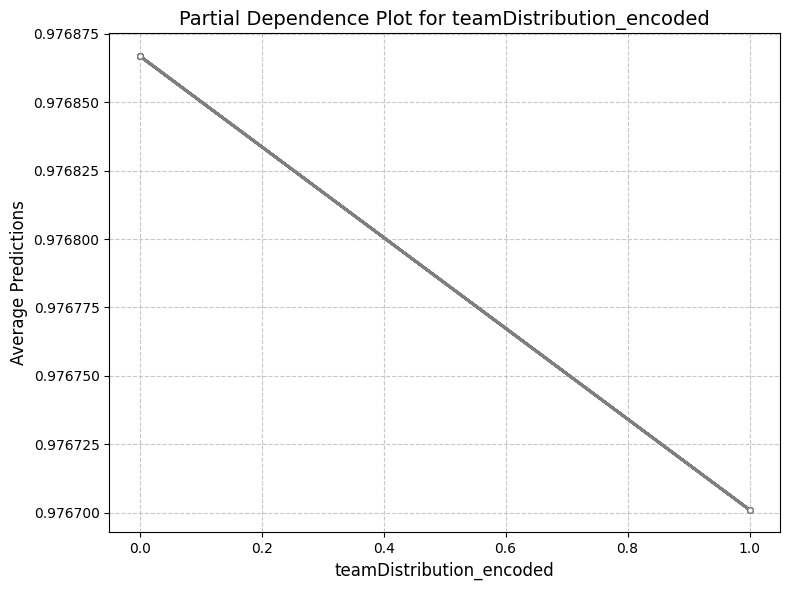

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Get the predictions of  neural network model on the test data
y_pred = model1.predict(X_test)


# Set a custom color palette
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f']

# Select the features for the partial dependence plot
feature_indices = [0, 1, 2, 3, 4, 5, 6, 7]  # Indices of the features in X_test
feature_names = ["femaleTeamMembersPercent", "meetingHoursTotal", "codingDeliverablesHoursTotal",
                 "globalLeadAdminHoursTotal", "commitCount", "issueCount", "teamLeadGender", "teamDistribution_encoded"]  # Names of the features

# Create a copy of the test data to modify the feature values
X_modified = X_test.copy()

# Plot each feature in a separate plot
for i in range(len(feature_indices)):
    feature_index = feature_indices[i]
    feature_values = X_test[:, feature_index]  # Extract the values of the selected feature

    # Calculate the average predictions while varying the feature of interest
    avg_predictions = []
    for value in feature_values:
        X_modified[:, feature_index] = value  # Set the feature value
        predictions = model1.predict(X_modified)  # Get the predictions
        avg_predictions.append(np.mean(predictions))  # Calculate the average prediction

    # Create a new plot for the feature with improved aesthetics
    plt.figure(figsize=(8, 6))
    plt.plot(feature_values, avg_predictions, color=colors[i], linewidth=2, marker='o', markersize=4, markerfacecolor='white')
    plt.xlabel(feature_names[i], fontsize=12)
    plt.ylabel('Average Predictions', fontsize=12)
    plt.title('Partial Dependence Plot for {}'.format(feature_names[i]), fontsize=14)
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()


In [ ]:
X_test.shape

(11, 6)

In [ ]:
y_test.shape

(11,)

In [ ]:
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score

# Create individual models
model = LogisticRegression()
model2 = RandomForestClassifier()
model3 = SVC()
model4 = model1


In [16]:
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score



y_pred_probs = model1.predict(X_test, verbose=0)

# Convert probabilities to binary class predictions using threshold 
threshold = 0.5
y_pred_classes = (y_pred_probs > threshold).astype(int)




# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred_classes)
precision = precision_score(y_test, y_pred_classes)
recall = recall_score(y_test, y_pred_classes)
f1 = f1_score(y_test, y_pred_classes)

# Print the results
print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1 score:', f1)


Accuracy: 0.9090909090909091
Precision: 1.0
Recall: 0.8888888888888888
F1 score: 0.9411764705882353


In [ ]:
from sklearn.metrics import precision_score, recall_score
from sklearn.svm import SVC

# Make predictions on the test set
predicted_labels_rf = rf_classifier.predict(X_test)
predicted_labels_svm = svm_classifier.predict(X_test)
predicted_labels_lr = logreg_classifier.predict(X_test)


1/1 [==============================] - 0s 54ms/step


In [ ]:
# Calculate precision for each model
precision_rf = precision_score(y_test, predicted_labels_rf)
precision_svm = precision_score(y_test, predicted_labels_svm)
precision_lr = precision_score(y_test, predicted_labels_lr)

In [ ]:
# Calculate recall for each model
recall_rf = recall_score(y_test, predicted_labels_rf)
recall_svm = recall_score(y_test, predicted_labels_svm)
recall_lr = recall_score(y_test, predicted_labels_lr)

In [ ]:
F1_rf = f1_score(y_test, predicted_labels_rf)
F1_svm = f1_score(y_test, predicted_labels_svm)
F1_lr = f1_score(y_test, predicted_labels_lr)

In [ ]:

models = ['Random Forest', 'SVM', 'Logistic Regression']
precision_scores = [precision_rf,  precision_svm, precision_lr]
recall_scores = [recall_rf, recall_svm, recall_lr]
accuracy_score = [rf_accuracy, svm_accuracy, lr_accuracy]
f1_scores = [F1_rf, F1_svm, F1_lr]

In [ ]:
# Print the performance scores
for i in range(len(models)):
    print(f"Performance scores for {models[i]}:")
    print("Precision:", precision_scores[i])
    print("Recall:", recall_scores[i])
    print("F1-score:", f1_scores[i])
    print("Accuracy", accuracy_score[i])
    print()

Performance scores for Random Forest:
Precision: 0.7777777777777778
Recall: 0.7777777777777778
F1-score: 0.7777777777777778
Accuracy 0.6363636363636364

Performance scores for SVM:
Precision: 1.0
Recall: 0.6666666666666666
F1-score: 0.8
Accuracy 0.7272727272727273

Performance scores for Logistic Regression:
Precision: 0.8571428571428571
Recall: 0.6666666666666666
F1-score: 0.75
Accuracy 0.6363636363636364



In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score


# Perform cross-validation
scores = cross_val_score(logreg_classifier, X, y, cv=5, scoring='accuracy')

print("Cross-Validation Scores:", scores)

# Compute mean accuracy
mean_accuracy = scores.mean()
print("Mean Accuracy:", mean_accuracy)

Cross-Validation Scores: [0.30769231 0.84615385 0.38461538 0.61538462 0.66666667]
Mean Accuracy: 0.5641025641025641
